# **Online Food Delivery Data Analysis**

# Problem Statement

The online food delivery industry generates large volumes of transactional data involving customers, restaurants, delivery partners, payments, and order outcomes. However, raw data often contains inconsistencies, missing values, outliers, and logical errors that can lead to misleading insights if not handled properly.

The objective of this project is to analyze an online food delivery dataset to:

Clean and preprocess the data for accuracy and reliability

Understand customer behavior and ordering patterns

Evaluate delivery performance and operational efficiency

Analyze the impact of discounts, distance, and peak hours on profitability

Identify key trends across cities, cuisines, and time periods

Build actionable insights that support business decision-making

This project aims to transform raw operational data into meaningful business intelligence using Python, SQL, EDA techniques, and visualization tools.

**Project Objectives**

Perform data cleaning and validation using business logic

Handle missing values, outliers, and invalid entries systematically

Conduct Exploratory Data Analysis (EDA) to uncover patterns and trends

Analyze customer segments, order behavior, and delivery performance

Measure profitability and discount impact

Store cleaned data in MySQL for analytical querying

Create an interactive Power BI dashboard for business reporting

# Step 1: Data Loading

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('online_food_delivery_data.csv')

# Step 2: Data Understanding

In [5]:
df.head()

,Order_ID,Customer_ID,Customer_Age,Customer_Gender,City,Area,Restaurant_ID,Restaurant_Name,Cuisine_Type,Order_Date,...,Final_Amount,Payment_Mode,Order_Status,Cancellation_Reason,Delivery_Partner_ID,Delivery_Rating,Restaurant_Rating,Order_Day,Peak_Hour,Profit_Margin
0,ORD000001,CUST6948,19.0,Male,NaN,Central,RES936,Restaurant_29,Chinese,10/20/2024,...,NaN,UPI,Delivered,NaN,DP563,5.0,4.4,Weekend,True,0.13
1,ORD000002,CUST6515,NaN,Female,Chennai,North,RES689,Restaurant_419,Chinese,8/12/2024,...,4849.0,COD,Delivered,NaN,DP369,5.0,4.7,Weekday,True,0.48
2,ORD000003,CUST1765,NaN,Male,Delhi,NaN,RES723,Restaurant_244,Arabian,12/8/2024,...,737.0,Wallet,Delivered,NaN,DP580,4.0,4.9,Weekend,True,0.08
3,ORD000004,CUST2744,NaN,Male,Mumbai,Central,RES951,Restaurant_178,Chinese,10/8/2024,...,NaN,UPI,Cancelled,Late Delivery,DP155,2.0,3.4,Weekday,NaN,0.04
4,ORD000005,CUST4389,57.0,Female,Chennai,South,RES419,Restaurant_262,Chinese,2/4/2024,...,352.0,Card,Delivered,NaN,DP728,2.0,4.4,Weekend,False,0.12


In [6]:
df.shape

(100000, 25)

In [7]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Age', 'Customer_Gender', 'City',
       'Area', 'Restaurant_ID', 'Restaurant_Name', 'Cuisine_Type',
       'Order_Date', 'Order_Time', 'Delivery_Time_Min', 'Distance_km',
       'Order_Value', 'Discount_Applied', 'Final_Amount', 'Payment_Mode',
       'Order_Status', 'Cancellation_Reason', 'Delivery_Partner_ID',
       'Delivery_Rating', 'Restaurant_Rating', 'Order_Day', 'Peak_Hour',
       'Profit_Margin'],
      dtype='object')

In [8]:
df.describe()

,Customer_Age,Delivery_Time_Min,Distance_km,Order_Value,Discount_Applied,Final_Amount,Delivery_Rating,Restaurant_Rating,Profit_Margin
count,49907.000000,66641.000000,66530.000000,66673.000000,83285.000000,44303.000000,83477.000000,100000.000000,100000.000000
mean,38.976516,127.475923,16.449242,2081.830126,93.936243,1961.101190,2.991531,4.249680,0.150362
std,12.372157,90.805839,12.256742,1553.628891,108.209904,1557.354417,1.414108,0.722554,0.201888
min,18.000000,20.000000,1.000000,150.000000,0.000000,-150.000000,1.000000,3.000000,-0.200000
25%,28.000000,45.000000,5.470000,673.000000,20.000000,559.000000,2.000000,3.600000,-0.020000
50%,39.000000,120.000000,9.970000,1197.000000,50.000000,1156.000000,3.000000,4.200000,0.150000
75%,50.000000,210.000000,27.430000,3494.000000,100.000000,3375.000000,4.000000,4.900000,0.320000
max,60.000000,300.000000,40.000000,5000.000000,300.000000,4980.000000,5.000000,5.500000,0.500000


In [9]:
df.describe(include='object')

,Order_ID,Customer_ID,Customer_Gender,City,Area,Restaurant_ID,Restaurant_Name,Cuisine_Type,Order_Date,Order_Time,Payment_Mode,Order_Status,Cancellation_Reason,Delivery_Partner_ID,Order_Day,Peak_Hour
count,100000,100000,75144,83274,83315,100000,100000,83115,98986,98002,80089,100000,9031,100000,100000,67038
unique,100000,8999,3,5,5,900,500,5,365,1,4,2,3,900,2,2
top,ORD000001,CUST2487,Other,Hyderabad,South,RES591,Restaurant_450,Indian,7/15/2024,0:00,Card,Delivered,Late Delivery,DP543,Weekday,False
freq,1,24,25135,16884,16725,145,246,16685,322,98002,20094,84964,3059,144,71370,33585


In [10]:
df['City'].value_counts()

City
Hyderabad    16884
Bangalore    16732
Delhi        16695
Mumbai       16493
Chennai      16470
Name: count, dtype: int64

In [11]:
df.dtypes

Order_ID                object
Customer_ID             object
Customer_Age           float64
Customer_Gender         object
City                    object
Area                    object
Restaurant_ID           object
Restaurant_Name         object
Cuisine_Type            object
Order_Date              object
Order_Time              object
Delivery_Time_Min      float64
Distance_km            float64
Order_Value            float64
Discount_Applied       float64
Final_Amount           float64
Payment_Mode            object
Order_Status            object
Cancellation_Reason     object
Delivery_Partner_ID     object
Delivery_Rating        float64
Restaurant_Rating      float64
Order_Day               object
Peak_Hour               object
Profit_Margin          float64
dtype: object

In [12]:
df.isnull().sum()

Order_ID                   0
Customer_ID                0
Customer_Age           50093
Customer_Gender        24856
City                   16726
Area                   16685
Restaurant_ID              0
Restaurant_Name            0
Cuisine_Type           16885
Order_Date              1014
Order_Time              1998
Delivery_Time_Min      33359
Distance_km            33470
Order_Value            33327
Discount_Applied       16715
Final_Amount           55697
Payment_Mode           19911
Order_Status               0
Cancellation_Reason    90969
Delivery_Partner_ID        0
Delivery_Rating        16523
Restaurant_Rating          0
Order_Day                  0
Peak_Hour              32962
Profit_Margin              0
dtype: int64

# Step 3: Data Cleaning

In [13]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Age', 'Customer_Gender', 'City',
       'Area', 'Restaurant_ID', 'Restaurant_Name', 'Cuisine_Type',
       'Order_Date', 'Order_Time', 'Delivery_Time_Min', 'Distance_km',
       'Order_Value', 'Discount_Applied', 'Final_Amount', 'Payment_Mode',
       'Order_Status', 'Cancellation_Reason', 'Delivery_Partner_ID',
       'Delivery_Rating', 'Restaurant_Rating', 'Order_Day', 'Peak_Hour',
       'Profit_Margin'],
      dtype='object')

In [14]:
df.columns=['order_id', 'customer_id', 'customer_age', 'customer_gender', 'city',
       'area', 'restaurant_id', 'restaurant_name', 'cuisine_type',
       'order_date', 'order_time', 'delivery_time_min', 'distance_km',
       'order_value', 'discount_applied', 'final_amount', 'payment_mode',
       'order_status', 'cancellation_reason', 'delivery_partner_id',
       'delivery_rating', 'restaurant_rating', 'order_day', 'peak_hour',
       'profit_margin']

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')

In [16]:
df.dtypes

order_id                       object
customer_id                    object
customer_age                  float64
customer_gender                object
city                           object
area                           object
restaurant_id                  object
restaurant_name                object
cuisine_type                   object
order_date             datetime64[ns]
order_time             datetime64[ns]
delivery_time_min             float64
distance_km                   float64
order_value                   float64
discount_applied              float64
final_amount                  float64
payment_mode                   object
order_status                   object
cancellation_reason            object
delivery_partner_id            object
delivery_rating               float64
restaurant_rating             float64
order_day                      object
peak_hour                      object
profit_margin                 float64
dtype: object

**Step 1.Handling missing values using mean, median, or mode**

In [17]:
df.isnull().sum()

order_id                   0
customer_id                0
customer_age           50093
customer_gender        24856
city                   16726
area                   16685
restaurant_id              0
restaurant_name            0
cuisine_type           16885
order_date              1014
order_time              1998
delivery_time_min      33359
distance_km            33470
order_value            33327
discount_applied       16715
final_amount           55697
payment_mode           19911
order_status               0
cancellation_reason    90969
delivery_partner_id        0
delivery_rating        16523
restaurant_rating          0
order_day                  0
peak_hour              32962
profit_margin              0
dtype: int64

--> customer_age column null values filled with mode and median

In [18]:
import numpy as np

def fill_customer_age(group):
    non_null = group.dropna()
    
    if len(non_null) == 0:
        return group  # handled later by global median
    
    # Try mode first
    mode_val = non_null.mode()
    if len(mode_val) > 0:
        return group.fillna(mode_val.iloc[0])
    
    # Fallback to median
    return group.fillna(non_null.median())

df['customer_age'] = df.groupby('customer_id')['customer_age'] \
                       .transform(fill_customer_age)
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_23436\1169123253.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_age'].fillna(df['customer_age'].median(), inplace=True)


--> customer_gender column missing values filled with mode and median

In [19]:
def fill_customer_gender(group):
    non_null = group.dropna()
    
    if len(non_null) == 0:
        return group  # handled later
    
    mode_val = non_null.mode()
    return group.fillna(mode_val.iloc[0])

df['customer_gender'] = df.groupby('customer_id')['customer_gender'] \
                          .transform(fill_customer_gender)

# Final fallback
df['customer_gender'].fillna('Unknown', inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_23436\1759293614.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_gender'].fillna('Unknown', inplace=True)


--> city, area and cuisine_type columns null values filled by 'Unknown' value 

In [20]:
df['city'] = df['city'].fillna('Unknown')
df['area'] = df['area'].fillna('Unknown')
df['cuisine_type'] = df['cuisine_type'].fillna('Unknown')

In [21]:
df.dtypes

order_id                       object
customer_id                    object
customer_age                  float64
customer_gender                object
city                           object
area                           object
restaurant_id                  object
restaurant_name                object
cuisine_type                   object
order_date             datetime64[ns]
order_time             datetime64[ns]
delivery_time_min             float64
distance_km                   float64
order_value                   float64
discount_applied              float64
final_amount                  float64
payment_mode                   object
order_status                   object
cancellation_reason            object
delivery_partner_id            object
delivery_rating               float64
restaurant_rating             float64
order_day                      object
peak_hour                      object
profit_margin                 float64
dtype: object

--> order_date and order_time columns dropping null values 

In [22]:
df = df.dropna(subset=['order_date'])

In [23]:
df=df.drop(['order_time'],axis=1)

--> delivery_time_min and distance_km columns null values filled with median

In [24]:
median_delivery_time = df['delivery_time_min'].median()

df['delivery_time_min'] = df['delivery_time_min'].fillna(median_delivery_time)

In [25]:
median_distance = df['distance_km'].median()

df['distance_km'] = df['distance_km'].fillna(median_distance)

--> order_value, discount_applied and final_amount columns

In [26]:
median_order_value = df['order_value'].median()

df['order_value'] = df['order_value'].fillna(median_order_value)

In [27]:
df['discount_applied'] = df['discount_applied'].fillna(0)

In [28]:
mask = df['final_amount'].isna()

df.loc[mask, 'final_amount'] = (
    df.loc[mask, 'order_value'] - df.loc[mask, 'discount_applied']
)

--> payment_mode columns

In [29]:
df['payment_mode'] = df['payment_mode'].fillna('Unknown')

--> order_status columns

In [30]:
df.loc[df['order_status'] == 'Delivered', 'cancellation_reason'] = 'Not Cancelled'
mask = (
    (df['order_status'] == 'Cancelled') &
    (df['cancellation_reason'].isna())
)

df.loc[mask, 'cancellation_reason'] = 'Reason Not Provided'

In [31]:
df.loc[df['order_status'] == 'Cancelled', 'delivery_rating'] = np.nan
median_rating = df.loc[df['order_status'] == 'Delivered','delivery_rating'].median()

df.loc[(df['order_status'] == 'Delivered') &(df['delivery_rating'].isna()),'delivery_rating'] = median_rating

In [32]:
df.dtypes

order_id                       object
customer_id                    object
customer_age                  float64
customer_gender                object
city                           object
area                           object
restaurant_id                  object
restaurant_name                object
cuisine_type                   object
order_date             datetime64[ns]
delivery_time_min             float64
distance_km                   float64
order_value                   float64
discount_applied              float64
final_amount                  float64
payment_mode                   object
order_status                   object
cancellation_reason            object
delivery_partner_id            object
delivery_rating               float64
restaurant_rating             float64
order_day                      object
peak_hour                      object
profit_margin                 float64
dtype: object

--> peak_hour

In [33]:
df['peak_hour'] = df['peak_hour'].fillna('Unknown')

After handled missing values 

In [34]:
df.isnull().sum()

order_id                   0
customer_id                0
customer_age               0
customer_gender            0
city                       0
area                       0
restaurant_id              0
restaurant_name            0
cuisine_type               0
order_date                 0
delivery_time_min          0
distance_km                0
order_value                0
discount_applied           0
final_amount               0
payment_mode               0
order_status               0
cancellation_reason        0
delivery_partner_id        0
delivery_rating        14886
restaurant_rating          0
order_day                  0
peak_hour                  0
profit_margin              0
dtype: int64

converting float columns to numeric columns

In [35]:
cols = [
    'customer_age', 'delivery_time_min','order_value', 
    'discount_applied','final_amount'
]

df[cols] = df[cols].astype(int)

**Capping Outliers**

In [36]:
out=['delivery_time_min',	'distance_km',	'order_value',	'final_amount']
def outlier(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)
for col in out:
    outlier(col)

Correcting invalid values (ratings > 5, negative profit margin)

In [37]:
df['delivery_rating'] = df['delivery_rating'].replace({np.nan: None})



In [38]:
df['delivery_rating'].value_counts(dropna=False)

delivery_rating
3.0     27630
None    14886
4.0     14242
2.0     14241
1.0     14141
5.0     13846
Name: count, dtype: int64

In [39]:
df.shape

(98986, 24)

Standardizing categorical values

In [40]:
cat_cols = [
    'customer_gender', 'city', 'area', 'cuisine_type',
    'payment_mode', 'order_status', 'order_day',
    'peak_hour', 'cancellation_reason'
]

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip()


In [41]:
for col in cat_cols:
    df[col] = df[col].str.lower()

In [42]:
df['cancellation_reason'].value_counts(dropna=False)

cancellation_reason
not cancelled          84100
reason not provided     5942
late delivery           3032
customer cancelled      2963
restaurant issue        2949
Name: count, dtype: int64

Ensuring logical consistency (e.g., cancelled orders vs ratings)




In [43]:
df.groupby('order_status')[['delivery_rating', 'restaurant_rating']].count()

,delivery_rating,restaurant_rating
order_status,,
cancelled,0,14886
delivered,84100,84100


In [44]:
df[(df['order_status'] == 'Cancelled') & (df['delivery_rating'].notna())]

,order_id,customer_id,customer_age,customer_gender,city,area,restaurant_id,restaurant_name,cuisine_type,order_date,...,final_amount,payment_mode,order_status,cancellation_reason,delivery_partner_id,delivery_rating,restaurant_rating,order_day,peak_hour,profit_margin


# **Exploratory Data Analysis (EDA)**

**Distribution of order values and delivery time**

**Order Value Distribution**

Order value distribution is right-skewed, indicating that most customers place moderate-value orders, while a small percentage contributes to high-value transactions.

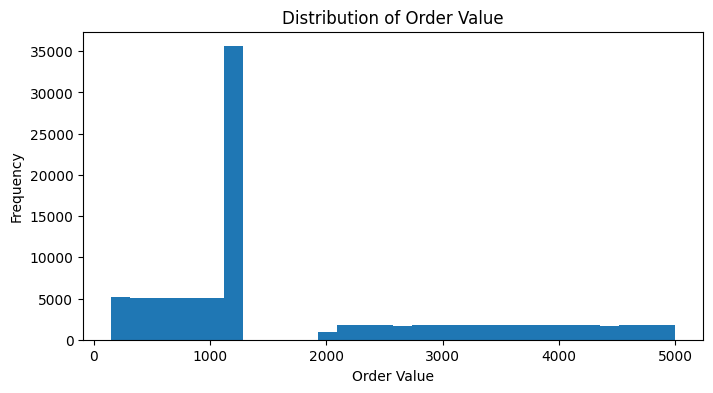

In [45]:
import matplotlib.pyplot as plt

# Distribution of Order Value
plt.figure(figsize=(8, 4))
plt.hist(df['order_value'], bins=30)
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

**Delivery Time Distribution**

Delivery time shows a multi-modal and right-skewed distribution, reflecting variability due to traffic conditions, distance, and peak-hour demand.

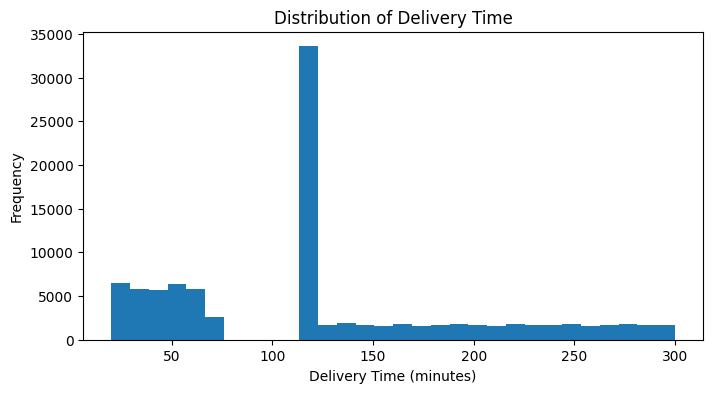

In [46]:
plt.figure(figsize=(8, 4))
plt.hist(df['delivery_time_min'], bins=30)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

**City-wise and cuisine-wise order analysis**

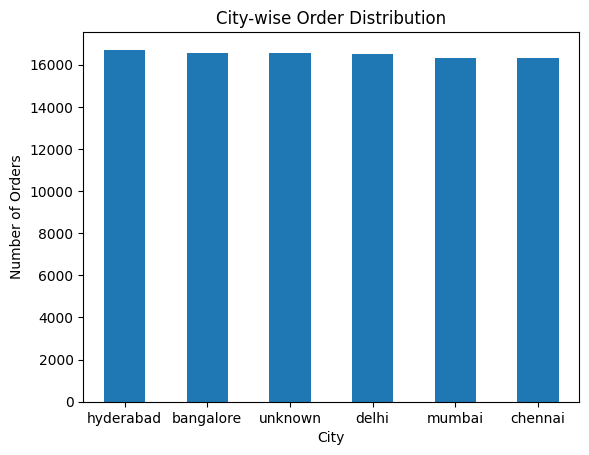

In [47]:
# City-wise order count
city_orders = df['city'].value_counts()

plt.figure()
city_orders.plot(kind='bar')
plt.title('City-wise Order Distribution')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


City-wise order distribution is nearly uniform across all five cities. This indicates balanced market penetration and consistent demand across locations, with no single city significantly outperforming others.

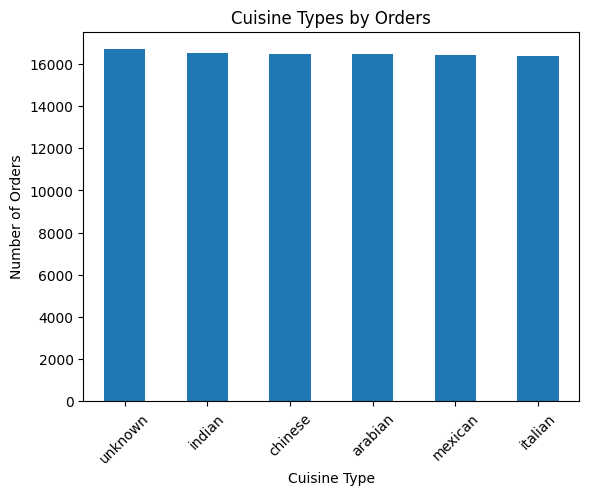

In [48]:
cuisine_orders = df['cuisine_type'].value_counts()

plt.figure()
cuisine_orders.plot(kind='bar')
plt.title('Cuisine Types by Orders')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


Cuisine-wise analysis shows a relatively even distribution of orders across all cuisine types. This suggests diversified customer preferences with no strong dominance of any single cuisine category.

**Weekend vs weekday demand**

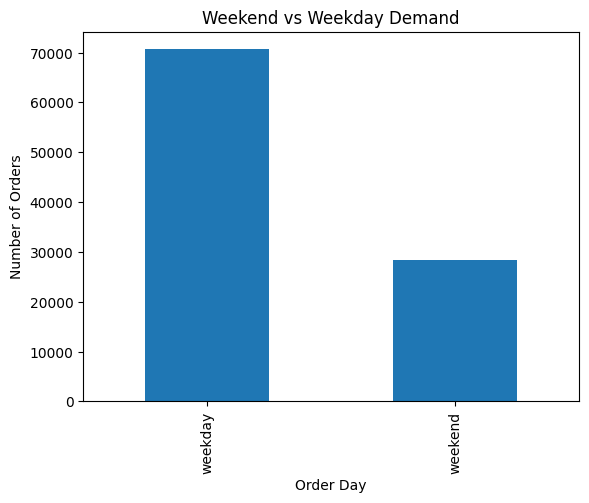

In [49]:
import matplotlib.pyplot as plt

order_day_counts = df['order_day'].value_counts()

plt.figure()
order_day_counts.plot(kind='bar')
plt.title('Weekend vs Weekday Demand')
plt.xlabel('Order Day')
plt.ylabel('Number of Orders')
plt.show()

In [50]:
(df['order_day'].value_counts(normalize=True) * 100).round(2)

order_day
weekday    71.34
weekend    28.66
Name: proportion, dtype: float64

Weekdays account for approximately 71% of total orders, indicating significantly higher demand compared to weekends.

**Distance vs delivery delay relationship**

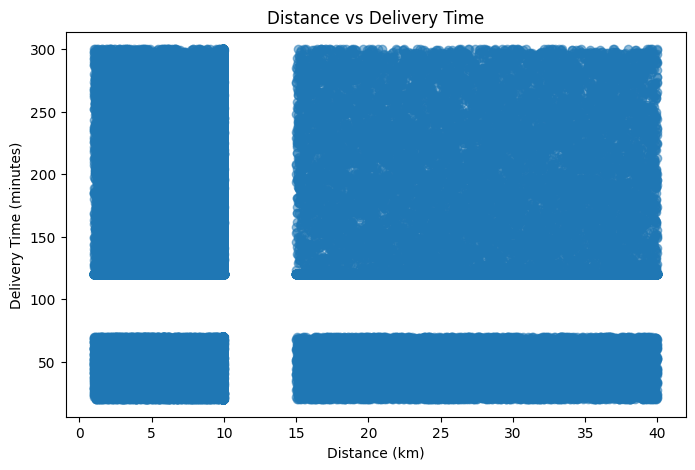

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(df['distance_km'], df['delivery_time_min'], alpha=0.5)
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.title('Distance vs Delivery Time')
plt.show()


In [52]:
df[['distance_km', 'delivery_time_min']].corr()

,distance_km,delivery_time_min
distance_km,1.000000,0.002161
delivery_time_min,0.002161,1.000000


Correlation analysis shows a very weak relationship (r = 0.002) between distance and delivery time. The scatter plot confirms that delivery time does not increase proportionally with distance. This indicates that factors such as traffic, peak hours, and restaurant preparation time have a stronger impact on delivery delay than distance alone.

**Cancellation reasons analysis**

In [53]:
cancelled_df = df[df['order_status'] == 'cancelled']

In [54]:
cancelled_df['cancellation_reason'].value_counts()

cancellation_reason
reason not provided    5942
late delivery          3032
customer cancelled     2963
restaurant issue       2949
Name: count, dtype: int64

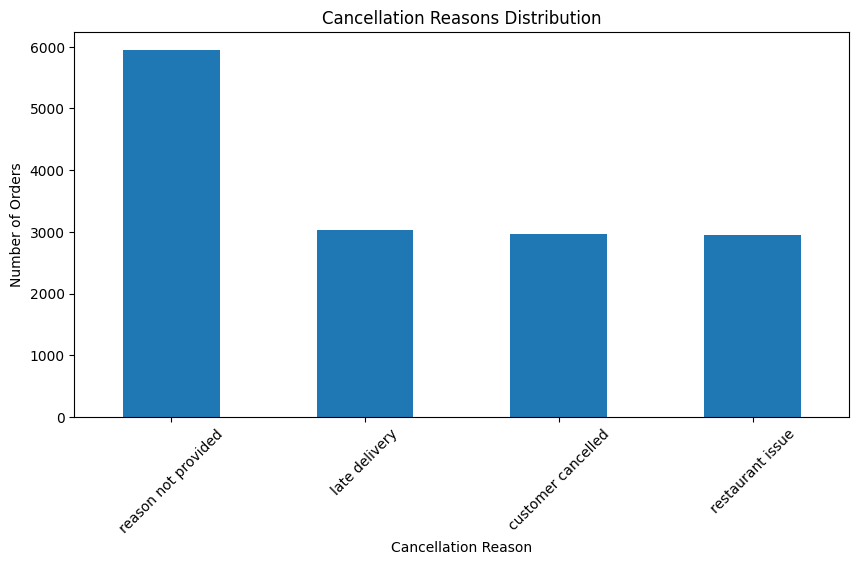

In [55]:
cancelled_df['cancellation_reason'].value_counts().plot(
    kind='bar',
    figsize=(10,5)
)

plt.title('Cancellation Reasons Distribution')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


A noticeable portion of cancelled orders fall under “Reason Not Provided,” suggesting gaps in cancellation tracking and customer feedback collection.

**Correlation analysis among numeric features**

In [56]:
df.dtypes

order_id                       object
customer_id                    object
customer_age                    int64
customer_gender                object
city                           object
area                           object
restaurant_id                  object
restaurant_name                object
cuisine_type                   object
order_date             datetime64[ns]
delivery_time_min               int64
distance_km                   float64
order_value                     int64
discount_applied                int64
final_amount                    int64
payment_mode                   object
order_status                   object
cancellation_reason            object
delivery_partner_id            object
delivery_rating                object
restaurant_rating             float64
order_day                      object
peak_hour                      object
profit_margin                 float64
dtype: object

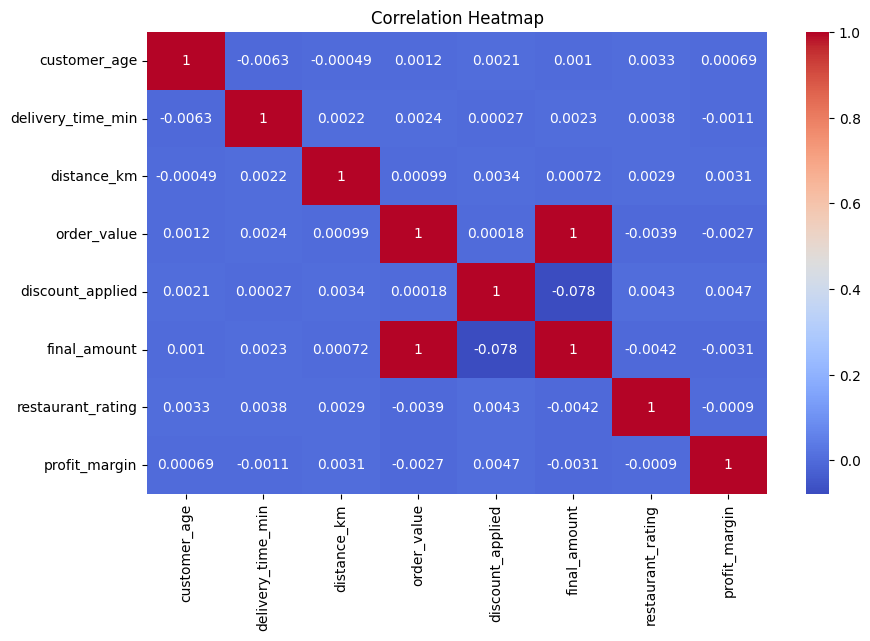

In [57]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Correlation analysis revealed that most numeric features have weak or negligible relationships with each other. 

Order value and final amount show perfect positive correlation since final amount is derived from order value. 

Distance and delivery time exhibit near-zero correlation, indicating that delivery delays are influenced more by operational factors than distance alone. 

Ratings show minimal correlation with delivery metrics, highlighting the subjective nature of customer feedback. 

Profit margin appears independent of customer and order characteristics, suggesting it is driven by internal business policies.

# **Feature Engineering**

**Profit margin percentage**

In [58]:
df['order_day'].value_counts()

order_day
weekday    70618
weekend    28368
Name: count, dtype: int64

Orders are significantly higher on weekdays (~71%) compared to weekends (~29%), indicating that food delivery demand is driven largely by working-day routines rather than leisure consumption.

**Peak hour indicator**

In [59]:
df['peak_hour'].value_counts(dropna=False)

peak_hour
false      33225
true       33141
unknown    32620
Name: count, dtype: int64

Peak hour classification helps identify rush-hour demand. A significant portion of orders falls outside peak hours, while missing values are retained as ‘Unknown’ due to unavailable order time data.

**Profit margin percentage**

In [60]:
df['cost'] = df['final_amount'] * (1 - df['profit_margin'])

In [61]:
df['profit_margin_per']=df['profit_margin']*100

In [62]:
df['profit_margin_per'].isnull().sum()

np.int64(0)

Profit margin percentage normalizes profit across different order sizes, allowing fair comparison of profitability across orders and restaurants.

**Delivery performance categories**

In [63]:
def delivery_performance(time):
    if time <= 30:
        return 'fast'
    elif time <= 60:
        return 'on time'
    elif time <= 120:
        return 'slightly delayed'
    else:
        return 'highly delayed'

df['delivery_performance'] = df['delivery_time_min'].apply(delivery_performance)

In [64]:
df['delivery_performance'].value_counts()

delivery_performance
slightly delayed    39741
highly delayed      32914
on time             19171
fast                 7160
Name: count, dtype: int64

Categorizing delivery performance into Fast, On-Time, and Delayed provides an intuitive understanding of operational efficiency and helps identify service improvement areas.

**Customer age groups**

In [65]:
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Mid-Age', 'Senior', 'Elder']

df['customer_age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels)

In [66]:
df['customer_age_group']=df['customer_age_group'].astype('object')

In [67]:
df.groupby('customer_age_group')['customer_age'].count()

customer_age_group
Adult          24541
Mid-Age        17441
Senior         22687
Teen            5457
Young Adult    28860
Name: customer_age, dtype: int64

Customer age grouping reveals that most orders come from young adults adults and senior, indicating that food delivery platforms primarily serve the working-age population.

In [68]:
df.dtypes

order_id                        object
customer_id                     object
customer_age                     int64
customer_gender                 object
city                            object
area                            object
restaurant_id                   object
restaurant_name                 object
cuisine_type                    object
order_date              datetime64[ns]
delivery_time_min                int64
distance_km                    float64
order_value                      int64
discount_applied                 int64
final_amount                     int64
payment_mode                    object
order_status                    object
cancellation_reason             object
delivery_partner_id             object
delivery_rating                 object
restaurant_rating              float64
order_day                       object
peak_hour                       object
profit_margin                  float64
cost                           float64
profit_margin_per        

In [69]:
df.shape

(98986, 28)

# **SQL Connection**

Store cleaned online food data in MySQL

In [72]:
import mysql.connector

conn= mysql.connector.connect(
    host="localhost",
    user="root",
    password="root"
)
cursor = conn.cursor()
print("MySQL connection established!")

MySQL connection established!


In [ ]:
cursor.execute("DROP TABLE IF EXISTS online_data;")
conn.commit()

print("Table 'online_data' deleted successfully!")

cursor.close()
conn.close()

**Create a Database in MySQL**

In [ ]:
cursor.execute("CREATE DATABASE IF NOT EXISTS online_food_db;")
print("MySQL database 'online_food_db' created successfully!")

MySQL database 'online_food_db' created successfully!


**Create a Table in MySQL**

In [ ]:
cursor.execute("USE online_food_db;")

create_table ="""
CREATE TABLE online_data (
    order_id VARCHAR(50),
    customer_id VARCHAR(50),
    customer_age INT,
    customer_gender VARCHAR(20),
    city VARCHAR(50),
    area VARCHAR(50),
    restaurant_id VARCHAR(50),
    restaurant_name VARCHAR(100),
    cuisine_type VARCHAR(50),
    order_date DATE,
    delivery_time_min INT,
    distance_km FLOAT,
    order_value INT,
    discount_applied INT,
    final_amount INT,
    payment_mode VARCHAR(30),
    order_status VARCHAR(30),
    cancellation_reason VARCHAR(100),
    delivery_partner_id VARCHAR(50),
    delivery_rating FLOAT,
    restaurant_rating FLOAT,
    order_day VARCHAR(20),
    peak_hour VARCHAR(20),
    profit_margin FLOAT,
    cost FLOAT,
    profit_margin_per FLOAT,
    delivery_performance VARCHAR(30),
    customer_age_group VARCHAR(30)
);"""

cursor.execute(create_table)
conn.commit()
print("Table created!")


Table created!


**Insert DataFrame into MySQL (mysql.connector method)**

In [ ]:
insert_query = """
INSERT INTO online_data (
     order_id,
    customer_id,
    customer_age,
    customer_gender,
    city,
    area,
    restaurant_id,
    restaurant_name,
    cuisine_type,
    order_date,
    delivery_time_min,
    distance_km,
    order_value,
    discount_applied,
    final_amount,
    payment_mode,
    order_status,
    cancellation_reason,
    delivery_partner_id,
    delivery_rating,
    restaurant_rating,
    order_day,
    peak_hour,
    profit_margin,
    cost,
    profit_margin_per,
    delivery_performance,
    customer_age_group 
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s, %s, %s, %s, %s)
"""

In [ ]:
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()
print("Data inserted successfully!")

Data inserted successfully!


Downloading cleaned dataset

In [73]:
df.to_csv("online_food_cleaned.csv", index=False)

# **Analyst Tasks (EDA & Analytics)**

**Customer & Order Analysis**

1. Identify top-spending customers

In [74]:
cursor.execute("USE online_food_db;")


SQL query

In [75]:
query = """
SELECT 
    customer_id,
    COUNT(order_id) AS total_orders,
    SUM(final_amount) AS total_spent
FROM online_data
GROUP BY customer_id
ORDER BY total_spent DESC
LIMIT 10;
"""

cursor.execute(query)

df_top_customers = pd.DataFrame(
    cursor.fetchall(),
    columns=[col[0] for col in cursor.description]
)

df_top_customers


,customer_id,total_orders,total_spent
0,CUST5267,20,51977
1,CUST1606,20,51371
2,CUST6706,18,47539
3,CUST6252,20,46025
4,CUST5534,20,45368
5,CUST1239,22,45233
6,CUST6457,20,44601
7,CUST1968,18,44381
8,CUST4431,23,44335
9,CUST8819,17,43963


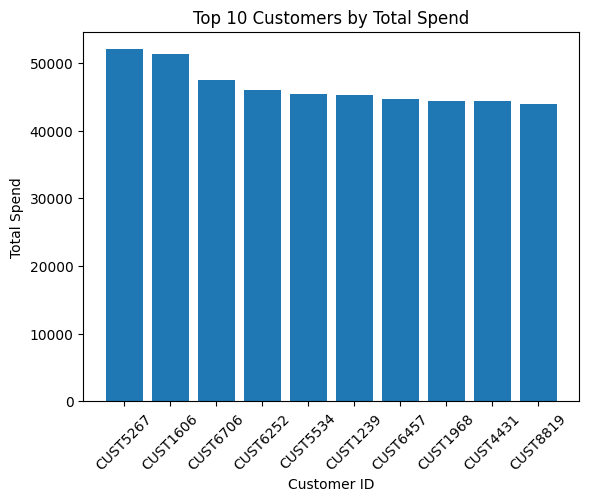

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df_top_customers['customer_id'], df_top_customers['total_spent'])
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Total Spend")
plt.ylabel("Total Spend")
plt.xlabel("Customer ID")
plt.show()


A small group of customers contributes disproportionately high revenue.

These customers place frequent and high-value orders, making them ideal targets for loyalty programs and premium offers.

Retaining top-spending customers can significantly increase overall profitability with minimal acquisition cost.

2. Analyze age group vs order value

In [ ]:
query = """
SELECT 
    customer_age_group,
    COUNT(order_id) AS total_orders,
    ROUND(AVG(order_value), 2) AS avg_order_value,
    SUM(order_value) AS total_order_value
FROM online_data
GROUP BY customer_age_group
ORDER BY avg_order_value DESC;
"""

cursor.execute(query)
age_value_df = pd.DataFrame(cursor.fetchall(), 
                            columns=[col[0] for col in cursor.description])

age_value_df



,customer_age_group,total_orders,avg_order_value,total_order_value
0,Adult,24541,1800.79,44193084
1,Senior,22687,1789.98,40609355
2,Young Adult,28860,1781.49,51413852
3,Mid-Age,17441,1777.34,30998613
4,Teen,5457,1774.39,9682843


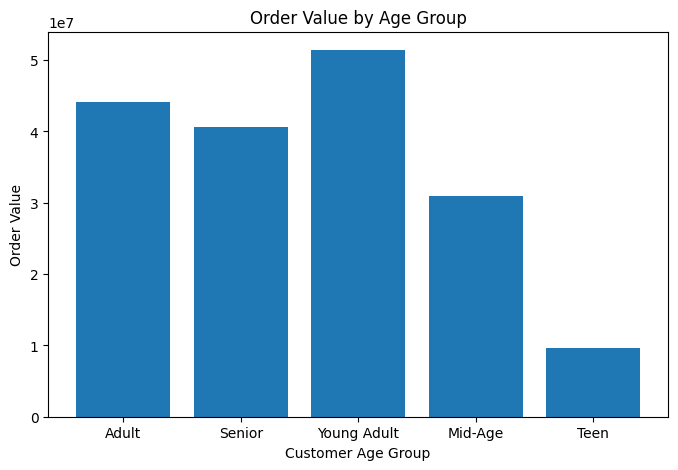

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(age_value_df['customer_age_group'], age_value_df['total_order_value'])
plt.xlabel("Customer Age Group")
plt.ylabel("Order Value")
plt.title("Order Value by Age Group")
plt.show()


Young Adult customers (e.g., 18-25) show higher order values, indicating stronger purchasing power.

Teen age groups tend to place less frequent so lower-value orders.


The platform’s primary revenue-driving segment comes from working-age customers.

3. Weekend vs weekday order patterns

In [ ]:
query = """
SELECT 
    order_day,
    COUNT(order_id) AS total_orders
FROM online_data
GROUP BY order_day;
"""

cursor.execute(query)
order_day_df = pd.DataFrame(cursor.fetchall(), 
                            columns=[col[0] for col in cursor.description])

order_day_df

,order_day,total_orders
0,weekend,28368
1,weekday,70618


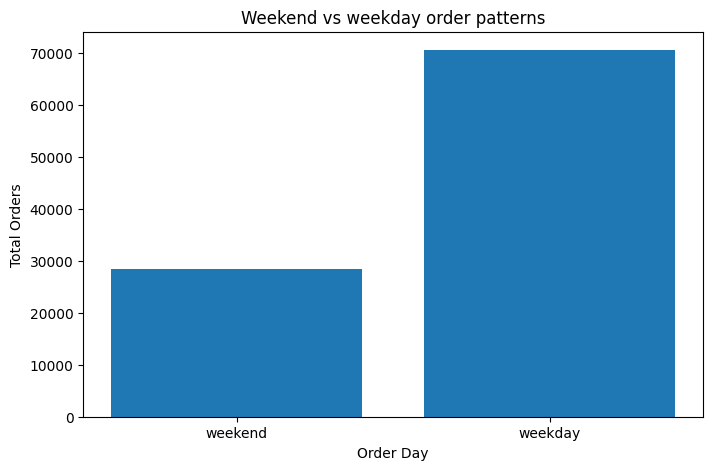

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(order_day_df['order_day'], order_day_df['total_orders'])
plt.xlabel("Order Day")
plt.ylabel("Total Orders")
plt.title("Weekend vs weekday order patterns")
plt.show()

Weekday orders dominate the platform, accounting for over 70% of total demand, indicating strong dependence on routine workday consumption such as office lunches and dinners.

**Revenue & Profit Analysis**

4. Monthly revenue trends

In [ ]:
query = """
SELECT 
    MONTH(order_date) AS month,
    count(order_id) as total_orders,
    SUM(final_amount) AS monthly_revenue
FROM online_data
GROUP BY MONTH(order_date)
ORDER BY month;
"""

cursor.execute(query)
df_month = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_month


,month,total_orders,monthly_revenue
0,1,8508,14553250
1,2,7921,13468861
2,3,8417,14254415
3,4,8115,13835930
4,5,8350,14279317
5,6,8180,14017850
6,7,8513,14715316
7,8,8261,14117629
8,9,8183,14159660
9,10,8306,14077108


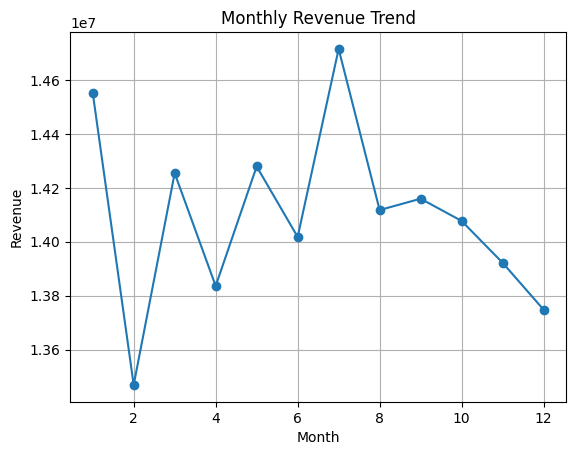

In [ ]:
plt.plot(df_month['month'], df_month['monthly_revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()


Monthly revenue shows seasonal variations, indicating demand fluctuations influenced by festivals, holidays, or promotional periods.

5. Impact of discounts on profit

In [ ]:
query = """
SELECT 
    CASE 
        WHEN discount_applied = 0 THEN 'No Discount'
        ELSE 'Discount Applied'
    END AS discount_category,
    COUNT(order_id) AS total_orders,
    ROUND(SUM(cost), 2) AS total_cost,
    ROUND(SUM(final_amount), 2) AS total_revenue,
    ROUND(SUM(final_amount) - SUM(cost), 2) AS total_profit,
    ROUND(
        (SUM(final_amount) - SUM(cost)) / SUM(final_amount) * 100,
        2
    ) AS profit_percentage
FROM online_data
GROUP BY discount_category;
"""

cursor.execute(query)
df_profit = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_profit

,discount_category,total_orders,total_cost,total_revenue,total_profit,profit_percentage
0,No Discount,33026,50350189.81,59275753,8925563.19,15.06
1,Discount Applied,65960,93442632.41,109873464,16430831.59,14.95


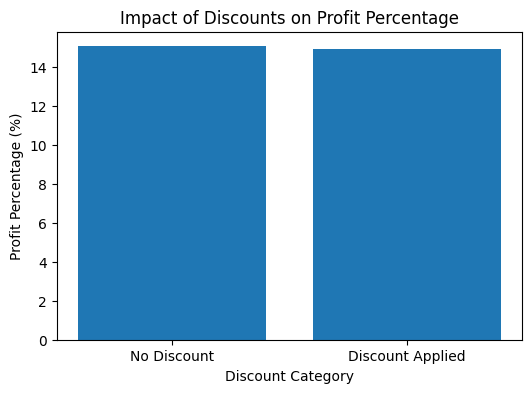

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(
    df_profit['discount_category'],
    df_profit['profit_percentage']
)

plt.title('Impact of Discounts on Profit Percentage')
plt.xlabel('Discount Category')
plt.ylabel('Profit Percentage (%)')
plt.show()


Orders with discounts generate higher volume but lower profit percentage, whereas non-discounted orders yield better margins despite lower order counts.

6. High-revenue cities and cuisines

In [ ]:
query = """
SELECT 
    city,
    COUNT(order_id) AS total_orders,
    sum(final_amount) as total_revenue
FROM online_data
GROUP BY city
order by total_revenue desc;
"""

cursor.execute(query)
df_city = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_city

,city,total_orders,total_revenue
0,bangalore,16567,28505313
1,hyderabad,16713,28400167
2,unknown,16552,28314068
3,delhi,16521,28083740
4,chennai,16312,27989526
5,mumbai,16321,27856403


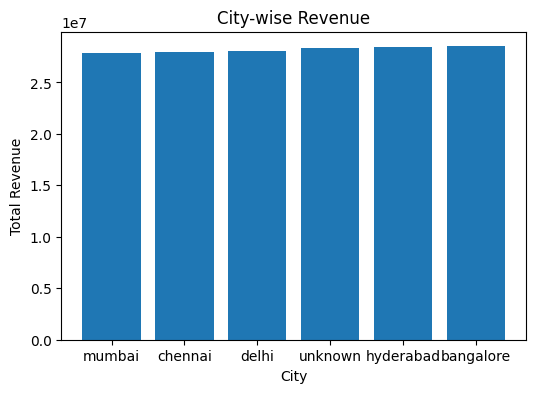

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(df_city['city'], df_city['total_revenue'])
plt.title('City-wise Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()

Revenue across cities such as Chennai, Bangalore, Mumbai, Delhi, and Hyderabad is relatively balanced, indicating uniform customer demand and stable platform presence across major urban markets. No single city dominates revenue generation.

In [ ]:
query = """
SELECT 
    cuisine_type,
    COUNT(order_id) AS total_orders,
    sum(final_amount) as total_revenue,
    avg(final_amount) as avg_total_revenue
FROM online_data
GROUP BY cuisine_type
order by total_revenue desc;
"""

cursor.execute(query)
df_cuisine = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_cuisine

,cuisine_type,total_orders,total_revenue,avg_total_revenue
0,unknown,16689,28712108,1720.4211
1,indian,16535,28382947,1716.5375
2,chinese,16486,28197139,1710.3687
3,mexican,16419,28156969,1714.9016
4,italian,16382,27852048,1700.1616
5,arabian,16475,27848006,1690.3190


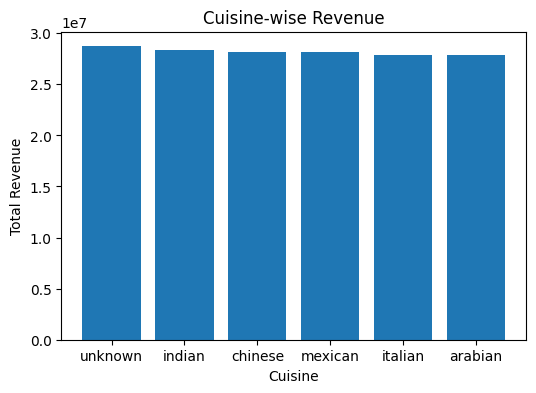

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(df_cuisine['cuisine_type'], df_cuisine['total_revenue'])
plt.title('Cuisine-wise Revenue')
plt.xlabel('Cuisine')
plt.ylabel('Total Revenue')
plt.show()

Cuisine-wise revenue distribution shows marginal differences among categories, suggesting diversified customer preferences rather than dependence on a single cuisine type. This indicates a healthy and balanced food ecosystem.

**Delivery Performance**

7. Average delivery time by city

In [ ]:
query = """
SELECT 
    city,
    count(order_id) as total_order,
    avg(delivery_time_min) as average_time
FROM online_data
where order_status ='delivered'
GROUP BY city
order by average_time desc;
"""

cursor.execute(query)
df_avg_time = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_avg_time

,city,total_order,average_time
0,mumbai,13881,125.9029
1,hyderabad,14179,125.1784
2,unknown,14061,125.1496
3,delhi,14029,124.9869
4,chennai,13854,124.3479
5,bangalore,14096,124.2963


<function matplotlib.pyplot.show(close=None, block=None)>

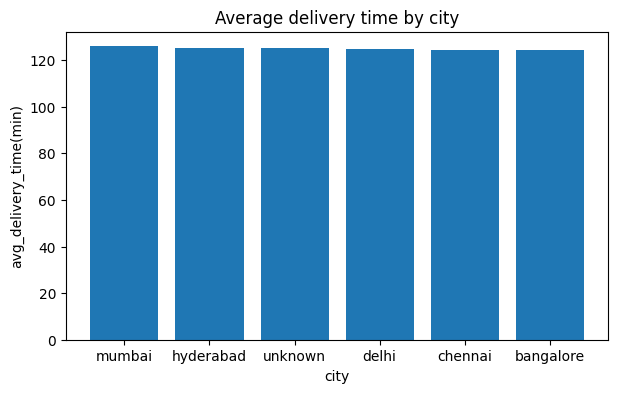

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(df_avg_time['city'],df_avg_time['average_time'])
plt.title('Average delivery time by city')
plt.xlabel('city')
plt.ylabel('avg_delivery_time(min)')
plt.show

Average delivery time varies slightly across cities, indicating operational differences.

8. Distance vs delivery delay analysis

In [ ]:
query = """
SELECT
    CASE
        WHEN distance_km <= 10 THEN 'upto 10 km range'
        WHEN distance_km <= 20 THEN '10 - 20 km range'
        WHEN distance_km <= 30 THEN '20 - 30 km range'
        ELSE '30 km above'
    END AS distance_range,
    COUNT(order_id) AS total_orders,
    ROUND(avg(delivery_time_min), 2) AS avg_delivery_time
FROM online_data
WHERE order_status = 'Delivered'
GROUP BY distance_range
ORDER BY avg_delivery_time;
"""

cursor.execute(query)
df_distance = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_distance

,distance_range,total_orders,avg_delivery_time
0,upto 10 km range,56163,124.70
1,30 km above,11049,125.21
2,10 - 20 km range,5616,125.51
3,20 - 30 km range,11272,125.87


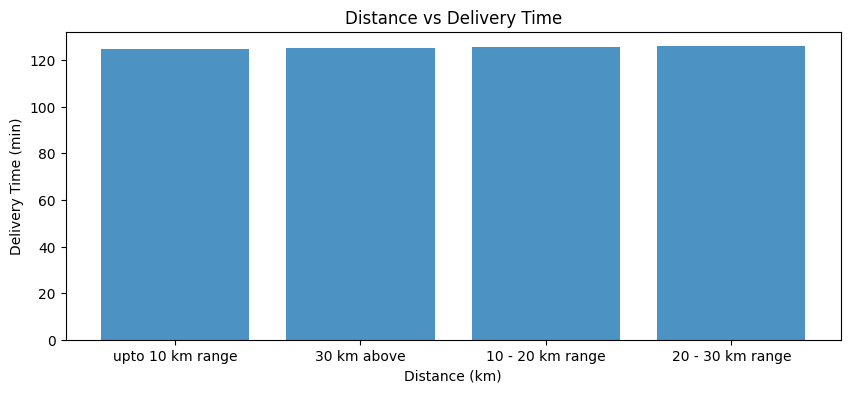

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(df_distance['distance_range'], df_distance['avg_delivery_time'],alpha=0.8)
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.show()


Distance has a weak correlation with delivery time, indicating that factors such as traffic conditions, peak hours, and delivery partner availability play a more significant role.

9. Delivery rating vs delivery time

In [ ]:
query = """
SELECT
    delivery_performance,
    COUNT(order_id) AS total_orders,
    avg(delivery_time_min) as avg_time,
    avg(delivery_rating) as avg_delivery_rating
FROM online_data
WHERE order_status = 'Delivered' and delivery_rating is not null
GROUP BY delivery_performance;
"""

cursor.execute(query)
df_delivery_rating = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_delivery_rating

,delivery_performance,total_orders,avg_time,avg_delivery_rating
0,highly delayed,27941,210.0701,2.997888
1,fast,6080,25.0038,3.011349
2,on time,16339,45.4194,2.988310
3,slightly delayed,33740,111.0501,2.987908


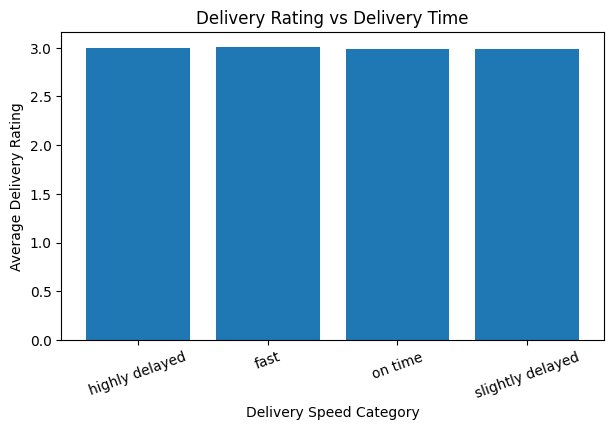

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(df_delivery_rating['delivery_performance'],
        df_delivery_rating['avg_delivery_rating'])

plt.xlabel('Delivery Speed Category')
plt.ylabel('Average Delivery Rating')
plt.title('Delivery Rating vs Delivery Time')
plt.xticks(rotation=20)
plt.show()


**Restaurant Performance**

10. Top-rated restaurants

In [ ]:
query = """
SELECT
    restaurant_name,
    COUNT(order_id) AS total_orders,
    ROUND(AVG(restaurant_rating), 2) AS avg_restaurant_rating
FROM online_data
WHERE restaurant_rating IS NOT NULL
GROUP BY restaurant_name
HAVING COUNT(order_id) >= 50
ORDER BY avg_restaurant_rating DESC
LIMIT 10;

"""

cursor.execute(query)
df_top_restaurants = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_top_restaurants

,restaurant_name,total_orders,avg_restaurant_rating
0,Restaurant_101,177,4.39
1,Restaurant_162,180,4.39
2,Restaurant_496,201,4.38
3,Restaurant_1,192,4.37
4,Restaurant_355,179,4.37
5,Restaurant_352,192,4.37
6,Restaurant_481,189,4.36
7,Restaurant_119,174,4.36
8,Restaurant_209,209,4.36
9,Restaurant_392,181,4.36


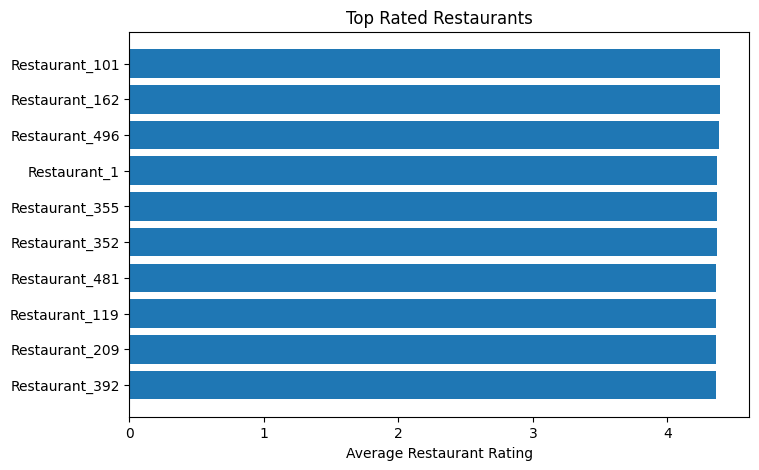

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(df_top_restaurants['restaurant_name'],
         df_top_restaurants['avg_restaurant_rating'])
plt.xlabel('Average Restaurant Rating')
plt.title('Top Rated Restaurants')
plt.gca().invert_yaxis()
plt.show()


The top-rated restaurants maintain an average rating above 4.5 with a significant number of orders, indicating consistent food quality and customer satisfaction. These restaurants can be considered benchmark performers on the platform.

11. Cancellation rate by restaurant

In [ ]:
query = """
SELECT
    restaurant_name,
    COUNT(order_id) AS total_orders,
    SUM(CASE WHEN order_status = 'Cancelled' THEN 1 ELSE 0 END) AS cancelled_orders,
    ROUND(
        (SUM(CASE WHEN order_status = 'Cancelled' THEN 1 ELSE 0 END) * 100.0)
        / COUNT(order_id),2) AS cancellation_rate_percentage
FROM online_data
GROUP BY restaurant_name
ORDER BY cancellation_rate_percentage DESC;
"""
cursor.execute(query)
df_top_restaurants = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_top_restaurants

,restaurant_name,total_orders,cancelled_orders,cancellation_rate_percentage
0,Restaurant_202,200,44,22.00
1,Restaurant_477,174,38,21.84
2,Restaurant_391,194,42,21.65
3,Restaurant_390,199,43,21.61
4,Restaurant_299,192,41,21.35
...,...,...,...,...
495,Restaurant_376,165,14,8.48
496,Restaurant_42,201,17,8.46
497,Restaurant_430,199,16,8.04
498,Restaurant_109,164,13,7.93


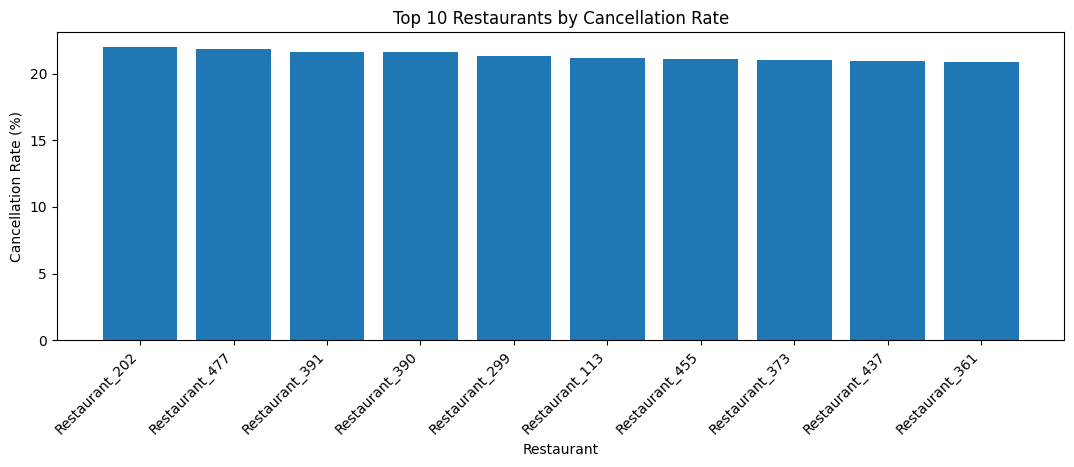

In [ ]:
top10=df_top_restaurants.head(10)
plt.figure(figsize=(13,4))
plt.bar(top10['restaurant_name'], top10['cancellation_rate_percentage'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Restaurant')
plt.ylabel('Cancellation Rate (%)')
plt.title('Top 10 Restaurants by Cancellation Rate')
plt.show()

12. Cuisine-wise performance

In [ ]:
query = """
SELECT
    cuisine_type,
    COUNT(order_id) AS total_orders,
    SUM(final_amount) AS total_revenue,
    ROUND(AVG(restaurant_rating), 2) AS avg_restaurant_rating,
    ROUND(AVG(profit_margin_per), 2) AS avg_profit_margin_percent
FROM online_data
GROUP BY cuisine_type
ORDER BY total_revenue DESC;

"""
cursor.execute(query)
df_cuisine_wise = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_cuisine_wise

,cuisine_type,total_orders,total_revenue,avg_restaurant_rating,avg_profit_margin_percent
0,unknown,16689,28712108,4.25,14.97
1,indian,16535,28382947,4.25,14.93
2,chinese,16486,28197139,4.24,14.95
3,mexican,16419,28156969,4.24,15.13
4,italian,16382,27852048,4.26,15.15
5,arabian,16475,27848006,4.25,15.11


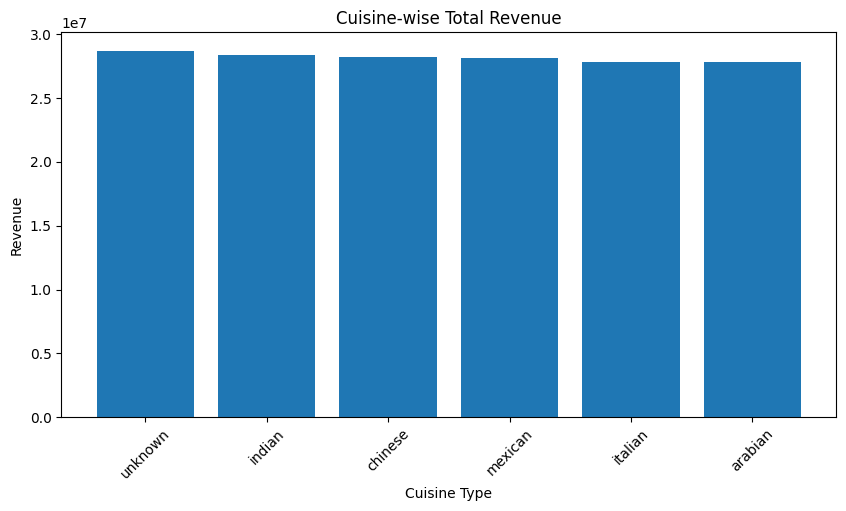

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df_cuisine_wise['cuisine_type'], df_cuisine_wise['total_revenue'])
plt.xticks(rotation=45)
plt.title('Cuisine-wise Total Revenue')
plt.xlabel('Cuisine Type')
plt.ylabel('Revenue')
plt.show()


Unknown and Indian cuisines contribute the slightly highest revenue, indicating customer demand and repeat ordering behavior.

**Operational Insights**

13. Peak hour demand analysis

In [ ]:
query = """
SELECT
    peak_hour,
    COUNT(order_id) AS total_orders,
    ROUND(SUM(final_amount), 2) AS total_revenue,
    ROUND(AVG(final_amount), 2) AS avg_order_value
FROM online_data
WHERE order_status = 'Delivered'
GROUP BY peak_hour
ORDER BY total_orders DESC;
"""
cursor.execute(query)
df_peak = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_peak

,peak_hour,total_orders,total_revenue,avg_order_value
0,false,28258,48227841,1706.70
1,true,28100,48042543,1709.70
2,unknown,27742,47514107,1712.71


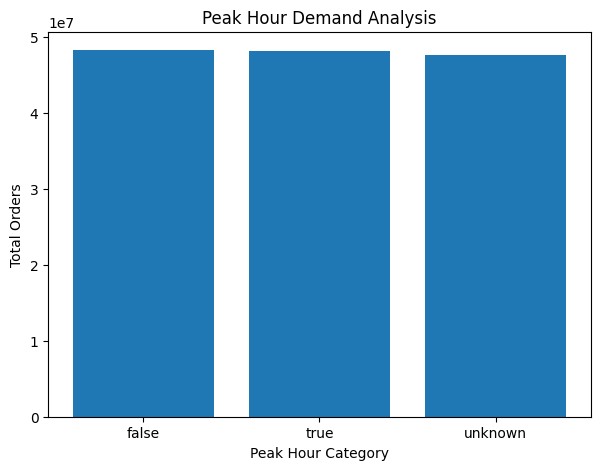

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(df_peak['peak_hour'], df_peak['total_revenue'])
plt.title('Peak Hour Demand Analysis')
plt.xlabel('Peak Hour Category')
plt.ylabel('Total Orders')
plt.show()


Peak hour demand analysis shows that a significant proportion of orders are placed during peak hours, contributing substantially to total revenue. Orders marked as ‘Unknown’ indicate missing time information, highlighting a data quality limitation rather than low demand.

14. Payment mode preferences

In [ ]:
query = """
SELECT 
    payment_mode,
    COUNT(order_id) AS total_orders,
    ROUND( COUNT(order_id) * 100.0 /  (SELECT COUNT(*) FROM online_data),  2 ) AS percentage_share
FROM online_data
GROUP BY payment_mode
ORDER BY total_orders DESC;
"""
cursor.execute(query)
df_payment = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_payment

,payment_mode,total_orders,percentage_share
0,card,19888,20.09
1,wallet,19885,20.09
2,cod,19767,19.97
3,upi,19731,19.93
4,unknown,19715,19.92


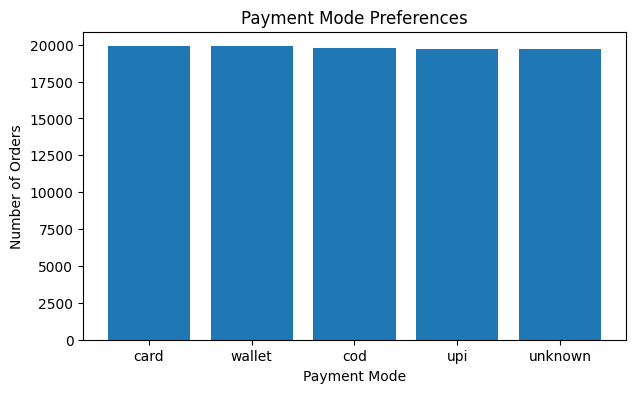

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(df_payment['payment_mode'],df_payment['total_orders'])
plt.title('Payment Mode Preferences')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.show()

15. Cancellation reason analysis

In [77]:
query = """
SELECT 
    cancellation_reason,
    COUNT(order_id) AS total_cancellations,
    ROUND(
        COUNT(order_id) * 100.0 / 
        SUM(COUNT(order_id)) OVER (), 
        2
    ) AS cancellation_percentage
FROM online_data
WHERE order_status = 'Cancelled'
GROUP BY cancellation_reason
ORDER BY total_cancellations DESC;
"""
cursor.execute(query)
df_cancellation = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
df_cancellation

,cancellation_reason,total_cancellations,cancellation_percentage
0,reason not provided,5942,39.92
1,late delivery,3032,20.37
2,customer cancelled,2963,19.90
3,restaurant issue,2949,19.81


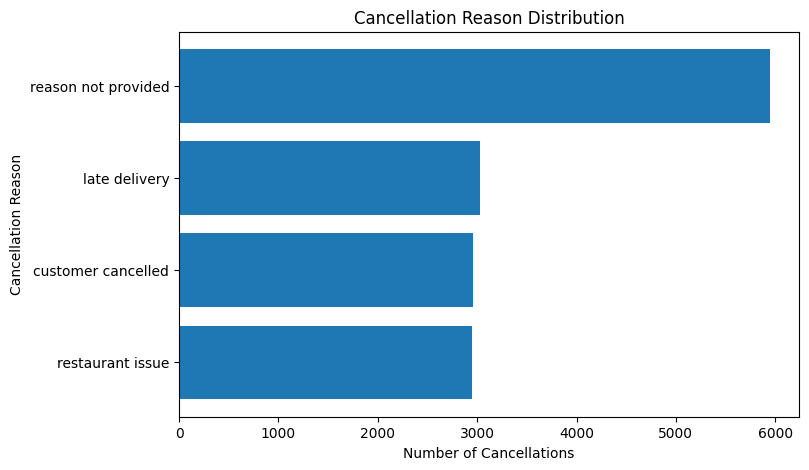

In [78]:
plt.figure(figsize=(8,5))
plt.barh( df_cancellation['cancellation_reason'], df_cancellation['total_cancellations'])
plt.xlabel('Number of Cancellations')
plt.ylabel('Cancellation Reason')
plt.title('Cancellation Reason Distribution')
plt.gca().invert_yaxis()
plt.show()


Cancellation reason analysis revealed that customer-driven factors and delivery delays were the primary causes. This highlights the need for better delivery time prediction and restaurant coordination to reduce cancellation rates.

# **Conclusion**

This project successfully demonstrates how structured data analysis can convert raw food delivery data into actionable insights. Through careful data cleaning, logical validation, exploratory analysis, and visualization, meaningful business patterns were identified related to customer behavior, delivery efficiency, and profitability.

The integration of Python for preprocessing, SQL for analytics, and Power BI for visualization ensures an end-to-end analytics solution that is scalable, interactive, and business-ready.

# **Future Enhancements**

Predictive modeling for delivery time estimation

Customer churn and repeat-order prediction

Restaurant performance scoring using ML models

Demand forecasting using time-series analysis

Integration with real-time data pipelines

Automated dashboard refresh using cloud databases

**Final Note**

This project showcases real-world data analyst skills, including:

Business-driven data cleaning

Insight-focused EDA

SQL-based analytics

Professional dashboard design

It is suitable for academic submission, portfolio presentation, and job interviews.